# Earth's lithospheric motions
## Exercises on present plate motions: rigidity and deformation

### Author(s), contact(s), and dates:
- Author: Valentina Espinoza Fernández (University of Copenhagen)
- Email:  vf@ign.ku.dk
- Date:   9th of January 2024

In [8]:
# Public dependencies
import os
import sys
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [9]:
# Online dependencies - GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/gdrive')
#path_to_EXERCISE_MATERIAL = '/content/gdrive/MyDrive/2024-Geodynamics/2_PLATE_MOTIONS'


# Local dependencies - YOUR COMPUTER
path_to_data = os.path.join(os.getcwd(), "DATA")
path_to_modules = os.path.join(os.getcwd(), "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)


from surfvel_dependencies import ev_to_surfvel_eastnorth

We start by uploading the data the model REBEL-2000. from Sella et al. (2002). 

In [10]:
angvel_data = pd.read_csv(os.path.join(path_to_data, "REBEL_SELLA2002_TABLE3.txt"), delimiter=' ', index_col=0)
angvel_data

For the purpose of this exercise, we will only use the average Euler vector, i.e. we will ignore uncertainties (given through the covariance matrix elements).

In [12]:
vec_Nz = angvel_data.loc["Nz"][["wX","wY","wZ"]] * (180/np.pi * 1e-3)     # Euler vector in cartesian coordinates for the Nazca plate [deg/Myr]
vec_Sa = angvel_data.loc["Sa"][["wX","wY","wZ"]] * (180/np.pi * 1e-3)     # Euler vector in cartesian coordinates for the South-America plate [deg/Myr]
vec_Sa

wX   -0.076198
wY   -0.455625
wZ    0.453224
Name: Nz, dtype: float64

These vectors are in Cartesian coordinates, which allows us to directly work algebraically with them to obtain the vector of relative motion between Sa/Nz:
$$\omega_{SA/NZ} = \omega_{ITRF/SA} - \omega_{ITRF/NZ}$$

In [14]:
vec_SaNz = vec_Sa - vec_Nz
vec_SaNz

wX    0.008023
wY    0.388346
wZ   -0.499579
dtype: float64

The next step is to take this Euler vector and calculate the relative velocity in the same coordinates as those used by Norabuena for the South American plate.

In [15]:
lon_pnts = [0.0, 0.0, 0.0, 0.0, 0.0]      ## write the coordinates of the blue dots here!!
lat_pnts = [0.0, 0.0, 0.0, 0.0, 0.0]

N_pnts = len(lon_pnts)
pts_azul = pd.DataFrame(data=dict(lon_pt = lon_pnts,
                                  lat_pt = lat_pnts,
                                  v_east = np.zeros(N_pnts),
                                  v_north = np.zeros(N_pnts)) )

v_total = np.zeros(N_pnts)

for i in range(N_pnts):
    v_east, v_north = ev_to_surfvel_eastnorth(vec_SaNz,                # function ev_to_surfvel_eastnorth takes the Euler vector in Cartesian coordinates as input
                                              pts_azul["lon_pt"][i],
                                              pts_azul["lat_pt"][i])

    pts_azul["v_east"][i], pts_azul["v_north"][i] = v_east, v_north      # The output consists of the east and north components in [cm/yr]

In [16]:
pts_azul

,lon_pt,lat_pt,v_east,v_north
0,0.0,0.0,-5.555066,-4.318207
1,0.0,0.0,-5.555066,-4.318207
2,0.0,0.0,-5.555066,-4.318207
3,0.0,0.0,-5.555066,-4.318207
4,0.0,0.0,-5.555066,-4.318207


How do these results compare to those obtained by Norabuena for in-situ measurements of the relative motion between South America and Nazca?

In [17]:
norab_data = pd.DataFrame(data=dict(v_east  = [0.0, 0.0, 0.0, 0.0, 0.0],           ## coloca los datos de Norabuena aqui!!
                                    v_north = [0.0, 0.0, 0.0, 0.0, 0.0]))

norab_data

,v_east,v_north
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0



Grafica una comparación de los resultados.

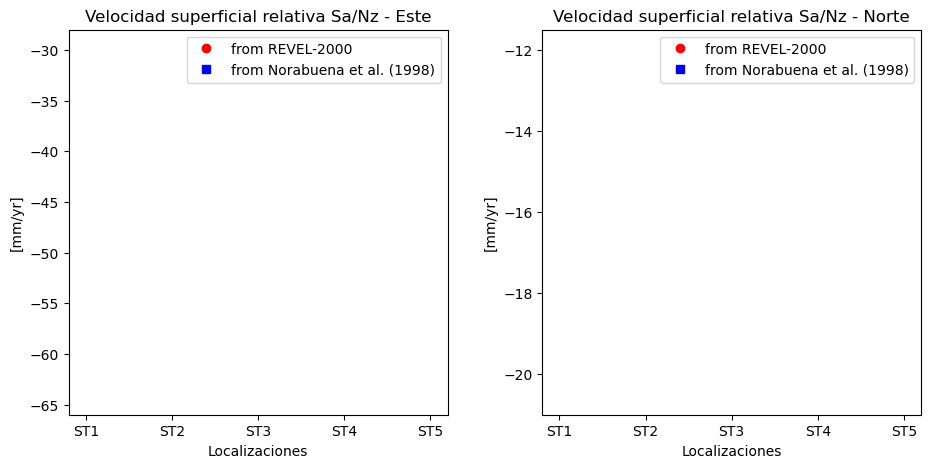

In [18]:
fig, ax = plt.subplots(1, 2, figsize =(11,5), gridspec_kw=dict(wspace=0.25))
ax[0].set(title = "Velocidad superficial relativa Sa/Nz - Este",
          xlabel = "Localizaciones",
          ylabel = "[mm/yr]",
          ylim = (-66, -28),
          xticks = np.arange(1,6),
          xticklabels = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5'],
          );

ax[1].set(title = "Velocidad superficial relativa Sa/Nz - Norte",
          xlabel = "Localizaciones",
          ylabel = "[mm/yr]",
          ylim = (-21, -11.5),
          xticks = np.arange(1,6),
          xticklabels = ['ST1', 'ST2', 'ST3', 'ST4', 'ST5'],
          );

ax[0].plot(np.arange(1, 6), pts_azul["v_east"], 'or', label="from REVEL-2000")
ax[0].plot(np.arange(1, 6), norab_data["v_east"], 'sb', label="from Norabuena et al. (1998)")

ax[1].plot(np.arange(1, 6), pts_azul["v_north"], 'or', label="from REVEL-2000");
ax[1].plot(np.arange(1, 6), norab_data["v_north"], 'sb', label="from Norabuena et al. (1998)");

ax[0].legend();
ax[1].legend();
